In [19]:
import random
import numpy as np
%pylab inline
datos=[]
x=0
delta=0.5
for k in range(1000000):
    x_n=x+random.uniform(-delta,delta)
    if random.uniform(0,1)< np.exp(-x_n**2/2)/np.exp(-x**2/2):
        x=x_n
    datos.append(x)


Populating the interactive namespace from numpy and matplotlib


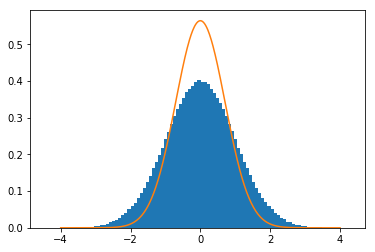

In [22]:
n_bins = 100

x_wf=np.linspace(-4,4,500)
y=(1/np.pi**0.5)*np.exp(-x_wf**2)

histograma=plt.hist(datos, bins=n_bins,normed=True)
wf=plt.plot(x_wf,y)
# We can set the number of bins with the `bins` kwarg
plt.show()
